In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

In [73]:
# Load the data
df = pd.read_csv("August 2018 Nationwide.csv")
airlines = pd.read_csv("Air Carriers.csv")

# Merge airline names with flight data
df = df.merge(airlines, left_on="OP_CARRIER_AIRLINE_ID", right_on="Code")

# Generate descriptive statistics report
grouped_origin = df.groupby("ORIGIN")
grouped_destination = df.groupby("DEST")
grouped_airline = df.groupby("Description")

# Aggregate statistics by origin airport
origin_stats = grouped_origin.agg({
    "DEP_DELAY": ["mean", "min", "max"],
    "ARR_DELAY": ["mean", "min", "max"],
    "CANCELLED": "mean"
})

# Aggregate statistics by destination airport
destination_stats = grouped_destination.agg({
    "DEP_DELAY": ["mean", "min", "max"],
    "ARR_DELAY": ["mean", "min", "max"],
    "CANCELLED": "mean"
})

# Aggregate statistics by airline
airline_stats = grouped_airline.agg({
    "DEP_DELAY": ["mean", "min", "max"],
    "ARR_DELAY": ["mean", "min", "max"],
    "CANCELLED": "mean"
})

# Print the results
print("---> 1. Statistics by Origin Airport:")
print(origin_stats)

print("\n---> 2. Statistics by Destination Airport:")
print(destination_stats)

print("\n---> 3. Statistics by Airline:")
print(airline_stats)

---> 1. Statistics by Origin Airport:
        DEP_DELAY                ARR_DELAY               CANCELLED
             mean   min     max       mean   min     max      mean
ORIGIN                                                            
ABE     16.191919 -24.0   423.0  10.951318 -43.0   407.0  0.036965
ABI      4.446328 -13.0   159.0   1.875706 -28.0   155.0  0.022099
ABQ     10.096146 -20.0   869.0   6.264858 -40.0   856.0  0.009839
ABR      0.161290 -19.0   143.0  -2.725806 -29.0   144.0  0.000000
ABY     22.954023 -17.0   978.0  21.678161 -33.0   993.0  0.022472
...           ...   ...     ...        ...   ...     ...       ...
WYS     -3.932203 -19.0    29.0  -1.305085 -25.0    44.0  0.000000
XNA     12.638211 -20.0  1195.0   9.261188 -33.0  1195.0  0.018327
YAK     -6.096774 -29.0    38.0  -7.145161 -34.0    38.0  0.000000
YKM     21.582524 -13.0   500.0  22.669903 -25.0   500.0  0.037383
YUM     -2.929825 -21.0   111.0  -4.219298 -29.0   144.0  0.000000

[365 rows x 7 columns]


# Task 2

In [74]:
# Identify the airline with the best on-time performance
median_departure_delay = df.groupby("Description")["DEP_DELAY"].median()
median_arrival_delay = df.groupby("Description")["ARR_DELAY"].median()

# Find the airline with the lowest median departure and arrival delay
best_airline = median_departure_delay.idxmin()
best_airline_delay = median_departure_delay.min()

print(f"\nThe airline with the best median departure delay is: {best_airline} ({best_airline_delay} minutes)")

best_airline = median_arrival_delay.idxmin()
best_airline_delay = median_arrival_delay.min()

print(f"The airline with the best median arrival delay is: {best_airline} ({best_airline_delay} minutes)")


The airline with the best median departure delay is: Air Wisconsin Airlines Corp: ZW (-5.0 minutes)
The airline with the best median arrival delay is: Delta Air Lines Inc.: DL (-8.0 minutes)


# Task 3

In [75]:
# Calculate the proportion of departures within 15 minutes of scheduled departure time for each airline
df["departure_on_time"] = df["DEP_DELAY"] <= 15
departure_on_time_proportion = df.groupby("Description")["departure_on_time"].mean()

# Find the airline with the highest proportion of on-time departures
best_otp_airline = departure_on_time_proportion.idxmax()
best_otp_proportion = departure_on_time_proportion.max()

print(f"\nThe airline with the best OTP based on departures within 15 minutes of scheduled time is: {best_otp_airline} ({best_otp_proportion*100:.2f}%)\n")


The airline with the best OTP based on departures within 15 minutes of scheduled time is: Hawaiian Airlines Inc.: HA (93.39%)



# Task 4

In [76]:
# Group and aggregate delay types
delay_types = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]

# Rank by overall number of occurrences
occurrences_ranking = df[delay_types].count().sort_values(ascending=False)

# Rank by total amount of delay caused
total_delay_ranking = df[delay_types].sum(axis=0).sort_values(ascending=False)

print("Ranking by overall number of occurrences:")
print(occurrences_ranking)

print("\nRanking by total amount of delay caused:")
print(total_delay_ranking)


Ranking by overall number of occurrences:
CARRIER_DELAY          157214
WEATHER_DELAY          157214
NAS_DELAY              157214
SECURITY_DELAY         157214
LATE_AIRCRAFT_DELAY    157214
dtype: int64

Ranking by total amount of delay caused:
LATE_AIRCRAFT_DELAY    4568704.0
CARRIER_DELAY          3083348.0
NAS_DELAY              3015544.0
WEATHER_DELAY           633603.0
SECURITY_DELAY           12045.0
dtype: float64


# Task 5

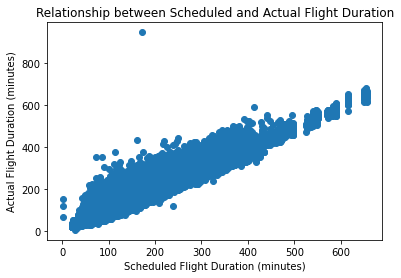

In [77]:
# Create a scatter plot of scheduled and actual flight duration
plt.scatter(df["CRS_ELAPSED_TIME"], df["ACTUAL_ELAPSED_TIME"])
plt.xlabel("Scheduled Flight Duration (minutes)")
plt.ylabel("Actual Flight Duration (minutes)")
plt.title("Relationship between Scheduled and Actual Flight Duration")
plt.show()

### _Upon analyzing the scatterplot, an intriguing pattern emerges: the majority of flights tend to adhere to their scheduled duration, with only minor delays. However, there are a few notable outliers that exhibit significantly longer delays, resulting from actual flight durations surpassing their scheduled times._

# Task 6

<ipython-input-78-dba464a2255b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atl_flights['SCHEDULED_DEP_HOUR'] = pd.to_datetime(atl_flights['CRS_DEP_TIME'], format='%H%M').dt.hour


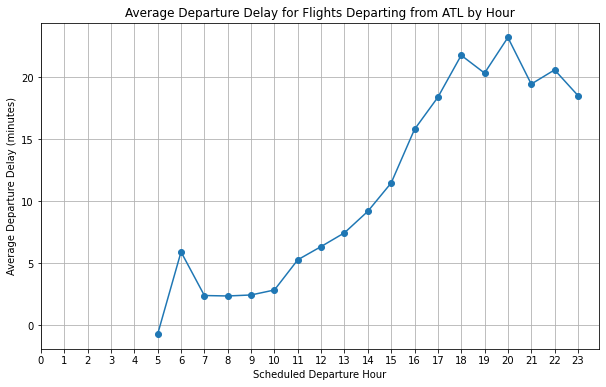

In [78]:
# Filter flights departing from Atlanta (ATL)
atl_flights = df[df['ORIGIN'] == 'ATL']

# Extract the hour from the scheduled departure time
atl_flights['SCHEDULED_DEP_HOUR'] = pd.to_datetime(atl_flights['CRS_DEP_TIME'], format='%H%M').dt.hour

# Group the flights by scheduled departure hour and calculate the average departure delay
delay_by_hour = atl_flights.groupby('SCHEDULED_DEP_HOUR')['DEP_DELAY'].mean()

# Plot the average departure delay by hour
plt.figure(figsize=(10, 6))
plt.plot(delay_by_hour.index, delay_by_hour.values, marker='o')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay for Flights Departing from ATL by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### _An interesting observation from the analysis of flights departing from Atlanta (ATL) is that during the early hours of the day, there is typically no departure delay. However, as the day progresses, starting around 5 am, there is a gradual increase in the delay rate, with an average delay of around 5 minutes. This increment follows a slightly linear pattern, where for every subsequent hour, there is an additional 1-2 minutes of delay on average. The most notable finding is that the departure delay tends to peak in the late hours of the day, reaching over 20 minutes. This suggests that as the day unfolds, the likelihood of experiencing significant departure delays increases._

<ipython-input-79-a0dcbee04872>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atl_flights['SCHEDULED_DEP_HOUR'] = pd.to_datetime(atl_flights['CRS_DEP_TIME'], format='%H%M').dt.hour
<ipython-input-79-a0dcbee04872>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atl_flights['DEPARTURE_ON_TIME'] = atl_flights['DEP_DELAY'] <= 0


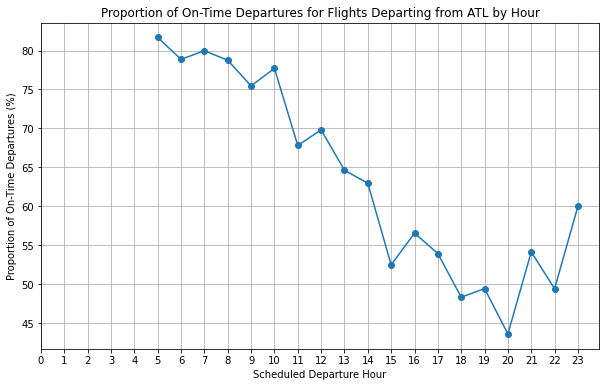

In [79]:
# Filter flights departing from Atlanta (ATL)
atl_flights = df[df['ORIGIN'] == 'ATL']

# Extract the hour from the scheduled departure time
atl_flights['SCHEDULED_DEP_HOUR'] = pd.to_datetime(atl_flights['CRS_DEP_TIME'], format='%H%M').dt.hour

atl_flights['DEPARTURE_ON_TIME'] = atl_flights['DEP_DELAY'] <= 0

# Calculate the proportion of on-time departures by hour
on_time_proportion = atl_flights['DEPARTURE_ON_TIME'].groupby(atl_flights['SCHEDULED_DEP_HOUR']).mean()

# Plot the proportion of on-time departures by hour
plt.figure(figsize=(10, 6))
plt.plot(on_time_proportion.index, on_time_proportion.values * 100, marker='o')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Proportion of On-Time Departures (%)')
plt.title('Proportion of On-Time Departures for Flights Departing from ATL by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()


### _The hours of the day when you are most likely to leave on time are during the early hours, specifically in the morning before 5 am. During this time period, there is typically no departure delay observed, indicating a higher likelihood of departing on time. The data suggests that as the day progresses, the probability of experiencing departure delays gradually increases. Therefore, if you aim to minimize the chances of encountering delays, opting for flights scheduled in the early morning hours would provide a greater likelihood of departing on time._

# Task 7

In [80]:
# Convert 'fl_date' column to datetime type
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

# Convert 'CRS_DEP_TIME' to string format with leading zeros
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(str).str.zfill(4)

# Filter flights departing from the New York area airports between 7 am - 8 am on Monday
ny_flights = df[(df['ORIGIN'].isin(['JFK', 'EWR', 'LGA'])) & (df['FL_DATE'].dt.weekday == 0) & (df['CRS_DEP_TIME'].between('0700', '0759'))]

# Calculate the proportion of delayed flights for each airport
delayed_flights = ny_flights[ny_flights['DEP_DELAY'] > 0]
delayed_proportion = delayed_flights['ORIGIN'].value_counts() / ny_flights['ORIGIN'].value_counts()

# Find the airport with the highest likelihood of delay
highest_delay_airport = delayed_proportion.idxmax()
highest_delay_likelihood = delayed_proportion.max()

print(f"The airport with the highest likelihood of delay for flights departing between 7 am - 8 am on a Monday is '{highest_delay_airport}' with a likelihood of delay of {highest_delay_likelihood*100:.2f}%")


The airport with the highest likelihood of delay for flights departing between 7 am - 8 am on a Monday is 'EWR' with a likelihood of delay of 26.96%


# Task 8

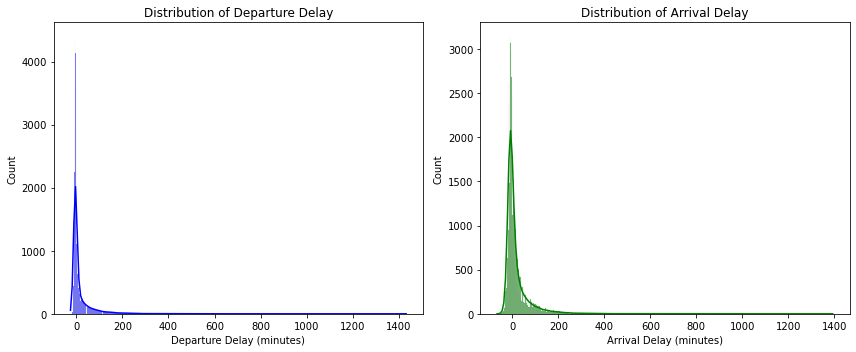

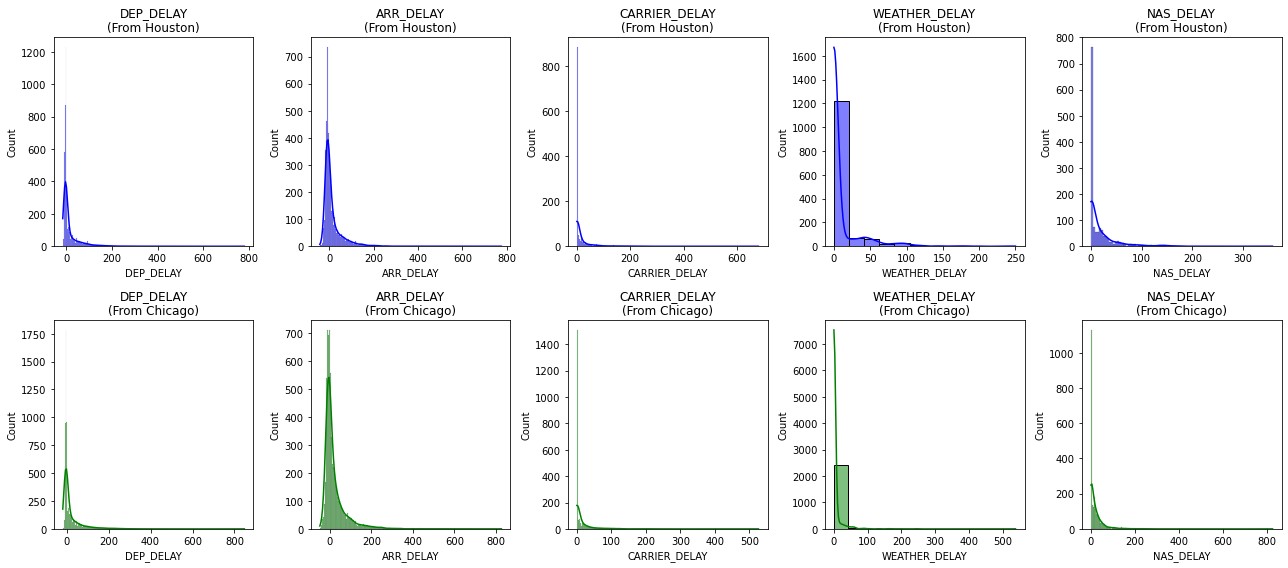

In [81]:
# Filter United Airlines (UA) flights
ua_flights = df[df['OP_CARRIER_AIRLINE_ID'] == 19977]

# ------ For all United Airlines (UA) flights

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of departure delay
sns.histplot(ua_flights['DEP_DELAY'].dropna(), ax=axes[0], kde=True, color='blue')
axes[0].set_title('Distribution of Departure Delay')
axes[0].set_xlabel('Departure Delay (minutes)')

# Plot the distribution of arrival delay
sns.histplot(ua_flights['ARR_DELAY'].dropna(), ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of Arrival Delay')
axes[1].set_xlabel('Arrival Delay (minutes)')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


# ------ Separately for flights which departed from Houston (IAH) and Chicago O’Hare (ORD) for each of the 5 delay types

# Create a figure with two subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 8))

# List of delay types
delay_types = ['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Iterate through the first 5 delay types and airports
for i, delay_type in enumerate(delay_types[:5]):
    # Filter flights departing from Houston (IAH)
    houston_flights = ua_flights[ua_flights['ORIGIN'] == 'IAH']
    # Filter flights departing from Chicago O'Hare (ORD)
    chicago_flights = ua_flights[ua_flights['ORIGIN'] == 'ORD']
    
    # Plot the distribution of delay for Houston flights
    sns.histplot(houston_flights[delay_type].dropna(), ax=axes[0, i], kde=True, color='blue')
    axes[0, i].set_title(f'{delay_type}\n(From Houston)')
    
    # Plot the distribution of delay for Chicago flights
    sns.histplot(chicago_flights[delay_type].dropna(), ax=axes[1, i], kde=True, color='green')
    axes[1, i].set_title(f'{delay_type}\n(From Chicago)')

# Remove empty subplots if there are fewer than 5 delay types
if len(delay_types) < 5:
    for j in range(len(delay_types), 5):
        fig.delaxes(axes[0, j])
        fig.delaxes(axes[1, j])

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Task 9

In [82]:
# Calculate the total carrier delay for each airline
carrier_delay_totals = df.groupby('OP_CARRIER_AIRLINE_ID')['CARRIER_DELAY'].sum()

# Calculate the total delay (all types) for each airline
total_delay_totals = df.groupby('OP_CARRIER_AIRLINE_ID')[['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum().sum(axis=1)

# Calculate the proportion of carrier delay to total delay for each airline
proportion_carrier_delay = carrier_delay_totals / total_delay_totals

# Find the airline with the highest rate of carrier-induced delays
highest_carrier_delay_airline = proportion_carrier_delay.idxmax()

# Get the proportion of total delay duration suffered by the airline due to carrier delay
proportion_total_delay = proportion_carrier_delay[highest_carrier_delay_airline]

# Get the airline name using the Air Carriers file
airline_name = df.loc[highest_carrier_delay_airline, 'Description']

# Print the results
print(f"The airline with the highest rate of carrier-induced delays is {airline_name}.")
print(f"The proportion of total delay duration suffered by this airline due to carrier delay is {proportion_total_delay:.2%}.")

The airline with the highest rate of carrier-induced delays is American Airlines Inc.: AA.
The proportion of total delay duration suffered by this airline due to carrier delay is 48.42%.


# Task 10

### _To investigate whether the frequency of late aircraft delays increases during the course of the day, we can analyze the data provided. We can perform a step-by-step approach to explore and test the hypothesis:_

### - _Filter the dataset to include only flights with late aircraft delays._
### - _Extract the hour of the scheduled departure time for each flight._
### - _Calculate the proportion of flights with late aircraft delays for each hour._
### - _Plot the proportion of late aircraft delays by hour._

<ipython-input-84-3296537528e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_aircraft_delays['Hour'] = pd.to_datetime(late_aircraft_delays['CRS_DEP_TIME'], format='%H%M').dt.hour


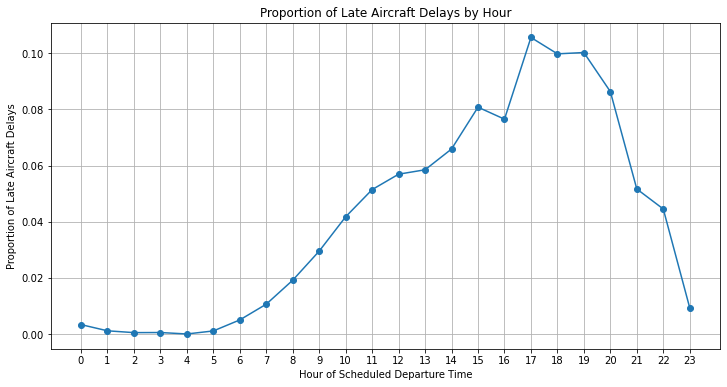

In [84]:
# Filter the dataset for flights with late aircraft delays
late_aircraft_delays = df[df['LATE_AIRCRAFT_DELAY'] > 0]

# Extract the hour of scheduled departure time
late_aircraft_delays['Hour'] = pd.to_datetime(late_aircraft_delays['CRS_DEP_TIME'], format='%H%M').dt.hour

# Calculate the proportion of flights with late aircraft delays for each hour
proportion_late_aircraft_delays = late_aircraft_delays.groupby('Hour').size() / len(late_aircraft_delays)

# Plot the proportion of late aircraft delays by hour
plt.figure(figsize=(12, 6))
plt.plot(proportion_late_aircraft_delays.index, proportion_late_aircraft_delays.values, marker='o')
plt.xlabel('Hour of Scheduled Departure Time')
plt.ylabel('Proportion of Late Aircraft Delays')
plt.title('Proportion of Late Aircraft Delays by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### _Based on the analysis of the data, it is observed that there is a relationship between the time of day and the proportion of delays caused by late aircraft. The analysis supports the hypothesis that the frequency of delays attributed to late aircraft increases as the day progresses. During the early hours until 5 am, the data shows a minimal proportion of delays caused by late aircraft. This suggests that early morning departures are less likely to be affected by delays due to previous flights arriving late. However, as the day advances, there is a gradual rise in the proportion of delays caused by late aircraft. The highest proportion, reaching 0.10 (10%), is observed around 5 pm in the evening, indicating a higher likelihood of experiencing delays during the late afternoon. This supports the idea that flights scheduled later in the day are more susceptible to delays caused by late arriving aircraft. Interestingly, the analysis also reveals a decline in the proportion of delays caused by late aircraft after 7 pm. This decline indicates that as the evening progresses, the occurrence of delays due to late aircraft decreases. By the end of 11 pm, the proportion of delays caused by late aircraft reaches a minimal value of 0.01 (1%). Overall, the findings from the analysis provide evidence in favor of the hypothesis that the frequency of delays caused by late aircraft increases throughout the day. The data suggests that early morning departures are less likely to be delayed due to late aircraft compared to flights scheduled later in the day. Hence, we do not reject the hypothesis._